In [2]:
import pandas as pd
import pandasql
import matplotlib.pyplot as plt
import os
from pandasql import sqldf
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
def load_query(path):
    with open(path) as file:
        query=file.read()
    return query    

In [5]:
pwd=os.getcwd()
data=pd.read_csv("Cigarette_Use_2011-2019.csv")
#data

In [6]:
query=load_query("Race_query.sql")
pysql=lambda q: sqldf(q,globals())
Race_data=pysql(query)
Race_data.to_csv('Yearwise_Racewise_Statewise.csv',index=False)
Race_data.head(5)

,Race,Year,State,Cigarette_Use
0,African American,2011,Alabama,20.700000
1,All Races,2011,Alabama,24.433333
2,American Indian/Alaska Native,2011,Alabama,51.600000
3,Asian/Pacific Islander,2011,Alabama,NaN
4,Hispanic,2011,Alabama,27.400000


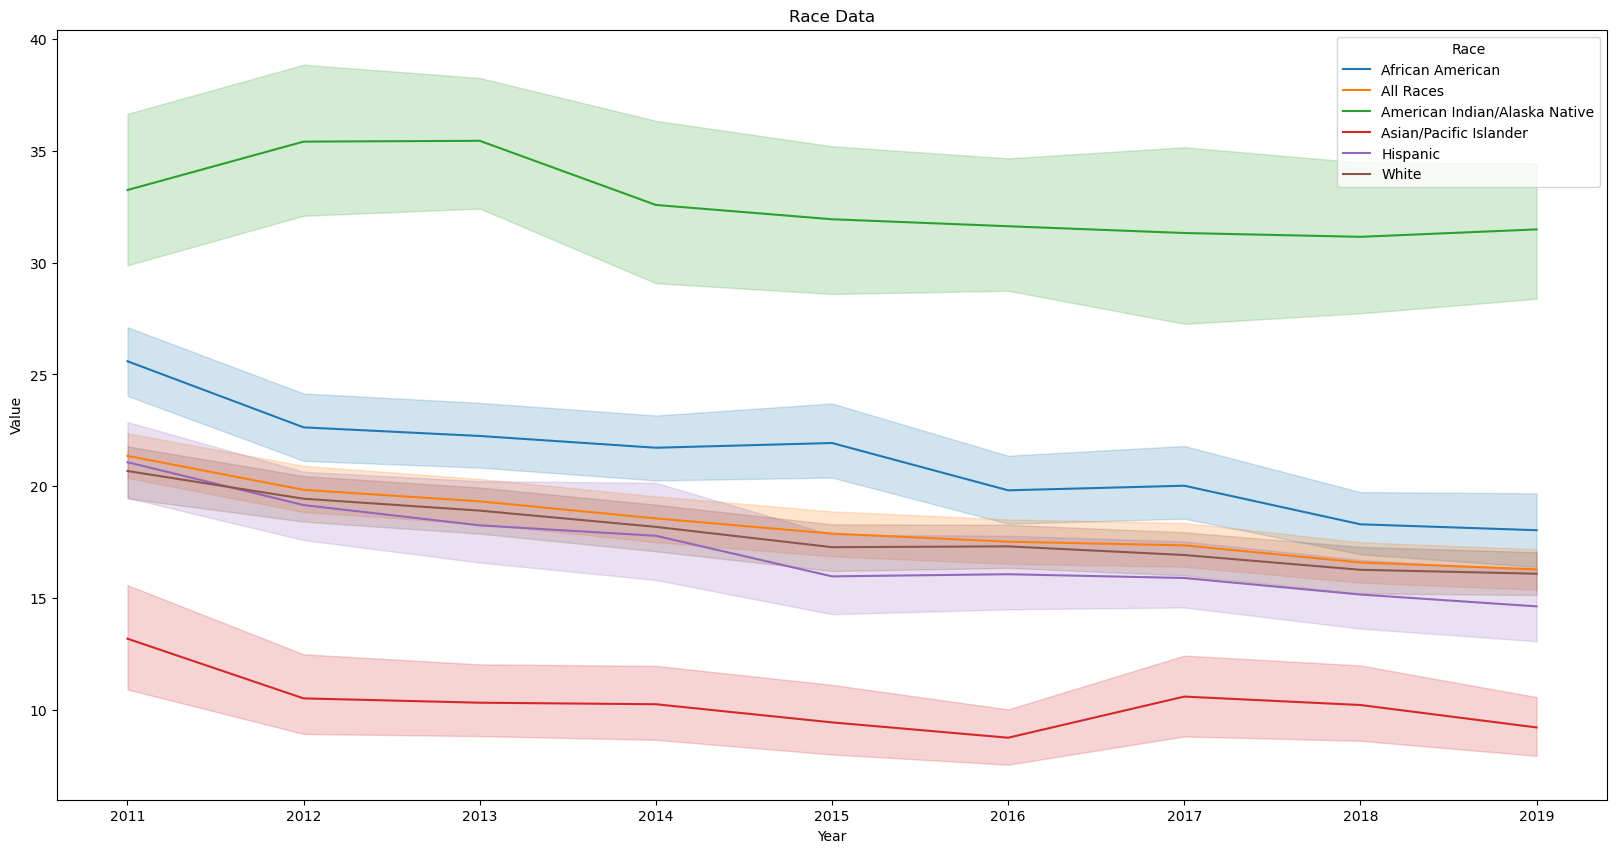

In [7]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Year', y='Cigarette_Use', hue='Race', data=Race_data)
plt.title(f'Race Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Race')
plt.show()

## Yearly Consumption Hike

In [8]:
Consumption_Change_query=load_query('Consumption_Hike_Query.sql')
Consumption_change_data=pysql(Consumption_Change_query)

In [9]:
Consumption_change_data

,State,Year,Gender,Race,Age,Education,Current_Consumption,Previous_Year_Consumption,Percent_Consumption_Change
0,Alabama,2012,Female,All Races,18 to 44 Years,All Grades,27.3,24.3,12.345679
1,Alabama,2012,Female,All Races,All Ages,All Grades,21.4,21.0,1.904762
2,Alabama,2012,Male,All Races,All Ages,All Grades,26.4,28.0,-5.714286
3,Alabama,2012,Overall,African American,All Ages,All Grades,22.0,20.7,6.280193
4,Alabama,2012,Overall,All Races,18 to 24 Years,All Grades,27.5,30.3,-9.240924
...,...,...,...,...,...,...,...,...,...
8051,Wyoming,2019,Overall,All Races,All Ages,All Grades,18.4,18.8,-2.127660
8052,Wyoming,2019,Overall,American Indian/Alaska Native,All Ages,All Grades,46.3,42.2,9.715640
8053,Wyoming,2019,Overall,Asian/Pacific Islander,All Ages,All Grades,NaN,NaN,NaN
8054,Wyoming,2019,Overall,Hispanic,All Ages,All Grades,21.1,26.6,-20.676692


In [10]:
Consumption_change_data.to_csv("Yearly_consumption_change.csv",index=False)